#  Extract reviews of any product from ecommerce website like amazon and Perform emotion mining

## Attaching Resources

### Importing Necessary Libraries

In [37]:
import nltk
import requests
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Performing Web Scraping

#### Adding Header And Funtion

In [5]:
headers = { 'authority': 'www.amazon.in',
            'accept-language': 'en-US,en;q=0.9',
            'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


In [6]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = bs(r.text, 'html.parser')
    return soup

In [7]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {  'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                        'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                        'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                        'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

#### Looping In URL

In [8]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Redgear-Cloak-Gaming-Headphones-Microphone/product-reviews/B07T9FV9YP/ref=cm_cr_getr_d_paging_btm_next_22?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

### Creating Dataframe With Reviewlist

In [9]:
rg = pd.DataFrame(reviewlist)

rg

,Title,Rating,Review,Review_Date
0,Great but not comfortable,4.0,Just padding is not that soft it hurts on ears...,Reviewed in India on 7 April 2023
1,Good headset for Gaming under 500rs,4.0,I'm using this headset so my honest review is ...,Reviewed in India on 19 March 2023
2,Good,4.0,It is very good for gaming and decent for list...,Reviewed in India on 19 March 2023
3,The product is very good it's been a year sinc...,4.0,The product is very good good rbg good conditi...,Reviewed in India on 12 March 2023
4,"built quality is good, volume control regulato...",4.0,"built quality is good, volume control regulato...",Reviewed in India on 23 March 2023
...,...,...,...,...
1595,Best gaming headphone under 1000,5.0,Best gaming headphone under this priceSond is ...,Reviewed in India on 29 October 2020
1596,Good.,5.0,"Good sounds quality, suitable for gaming and m...",Reviewed in India on 6 December 2020
1597,EXTREME NICE HEADPHONE,5.0,its all over my ear so no pain in ear and its ...,Reviewed in India on 4 May 2021
1598,Comfortable and Tagda quality,5.0,I like the Product its very comfortable and so...,Reviewed in India on 11 February 2021


In [10]:
rg["Review_Date"] = rg["Review_Date"].replace('Reviewed in India on','', regex=True)
rg['Review_Date'] = pd.to_datetime(rg['Review_Date'])

rg

,Title,Rating,Review,Review_Date
0,Great but not comfortable,4.0,Just padding is not that soft it hurts on ears...,2023-04-07
1,Good headset for Gaming under 500rs,4.0,I'm using this headset so my honest review is ...,2023-03-19
2,Good,4.0,It is very good for gaming and decent for list...,2023-03-19
3,The product is very good it's been a year sinc...,4.0,The product is very good good rbg good conditi...,2023-03-12
4,"built quality is good, volume control regulato...",4.0,"built quality is good, volume control regulato...",2023-03-23
...,...,...,...,...
1595,Best gaming headphone under 1000,5.0,Best gaming headphone under this priceSond is ...,2020-10-29
1596,Good.,5.0,"Good sounds quality, suitable for gaming and m...",2020-12-06
1597,EXTREME NICE HEADPHONE,5.0,its all over my ear so no pain in ear and its ...,2021-05-04
1598,Comfortable and Tagda quality,5.0,I like the Product its very comfortable and so...,2021-02-11


## Performing EDA In Dataset

### Visualizing The Data

In [30]:
ts = rg[['Rating','Review_Date']]
ts.set_index('Review_Date', inplace=True)

ts.head()

,Rating
Review_Date,
2023-04-07,4.0
2023-03-19,4.0
2023-03-19,4.0
2023-03-12,4.0
2023-03-23,4.0
...,...
2020-10-29,5.0
2020-12-06,5.0
2021-05-04,5.0


#### Ploting Barplot

Text(0, 0.5, 'Count')

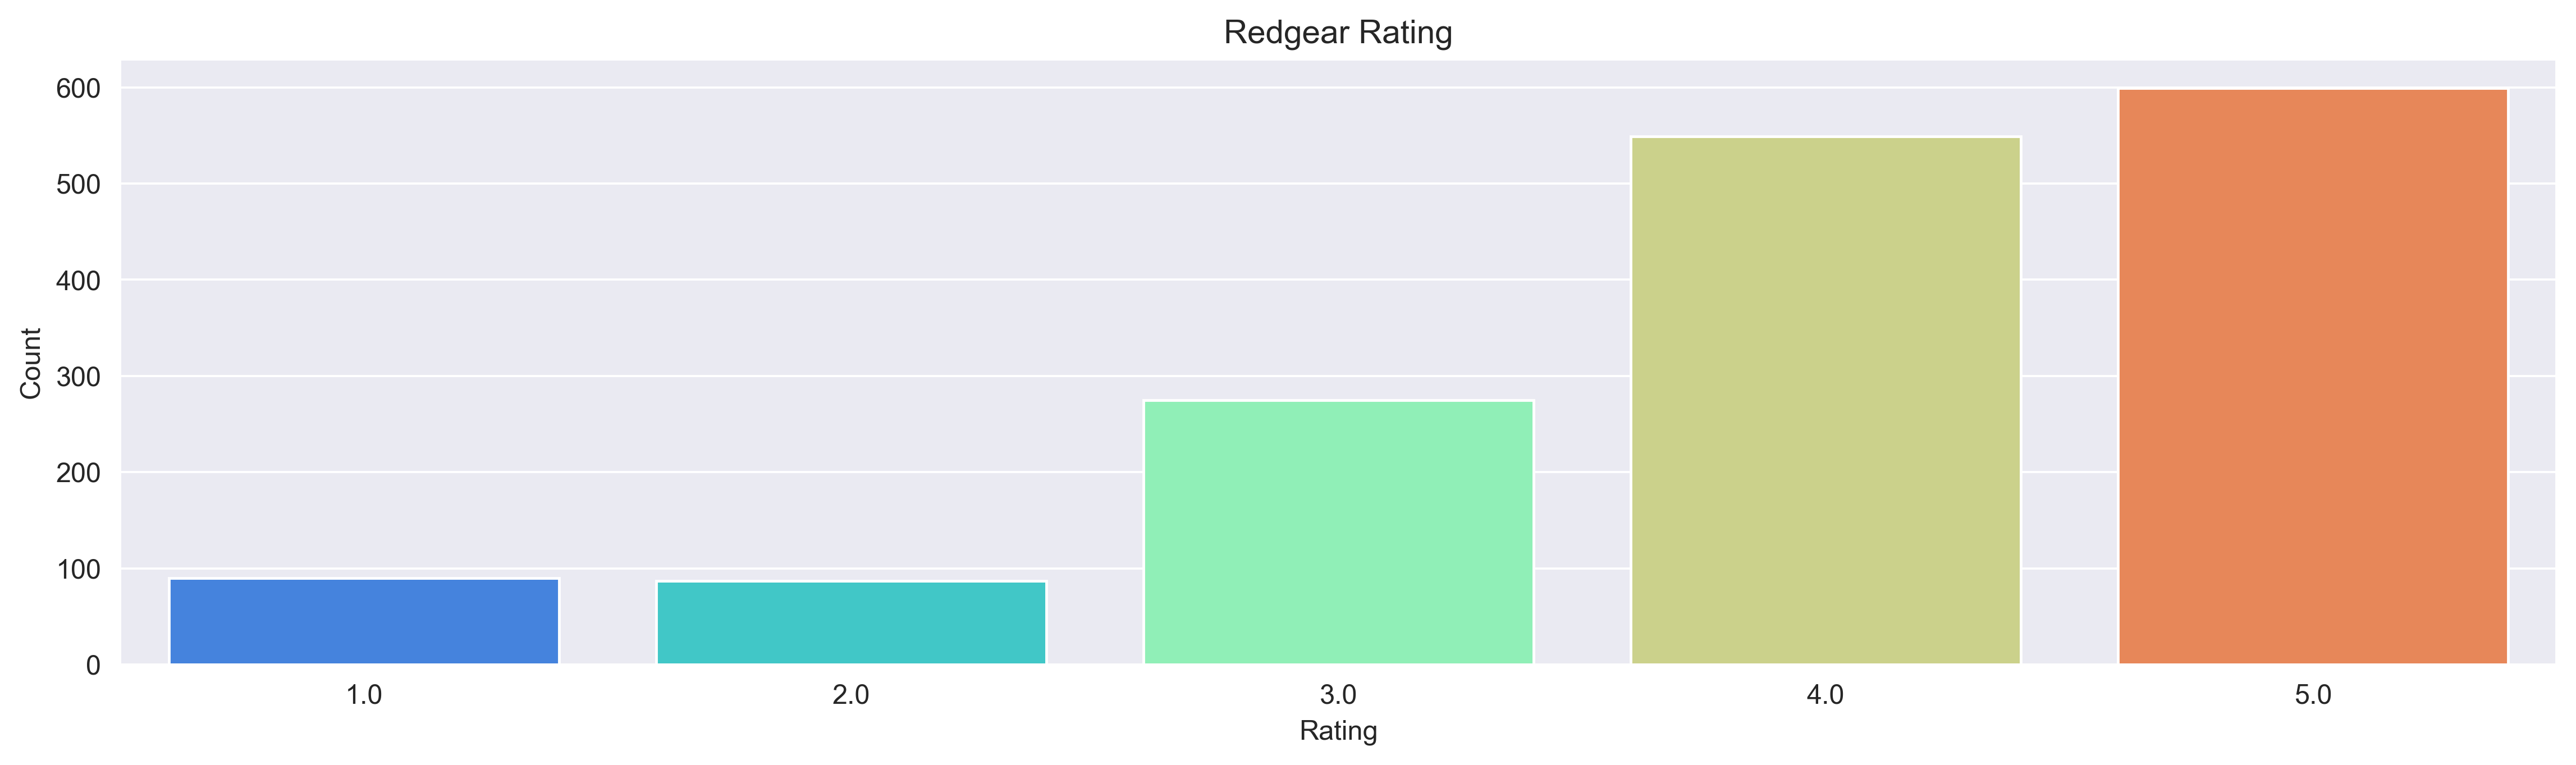

In [34]:
plt.title('Redgear Rating')
sns.barplot(ts['Rating'].value_counts().index, ts['Rating'].value_counts().values, palette = 'rainbow')
plt.xlabel('Rating')
plt.ylabel('Count')

#### Ploting Pieplot

<AxesSubplot:ylabel='Rating'>

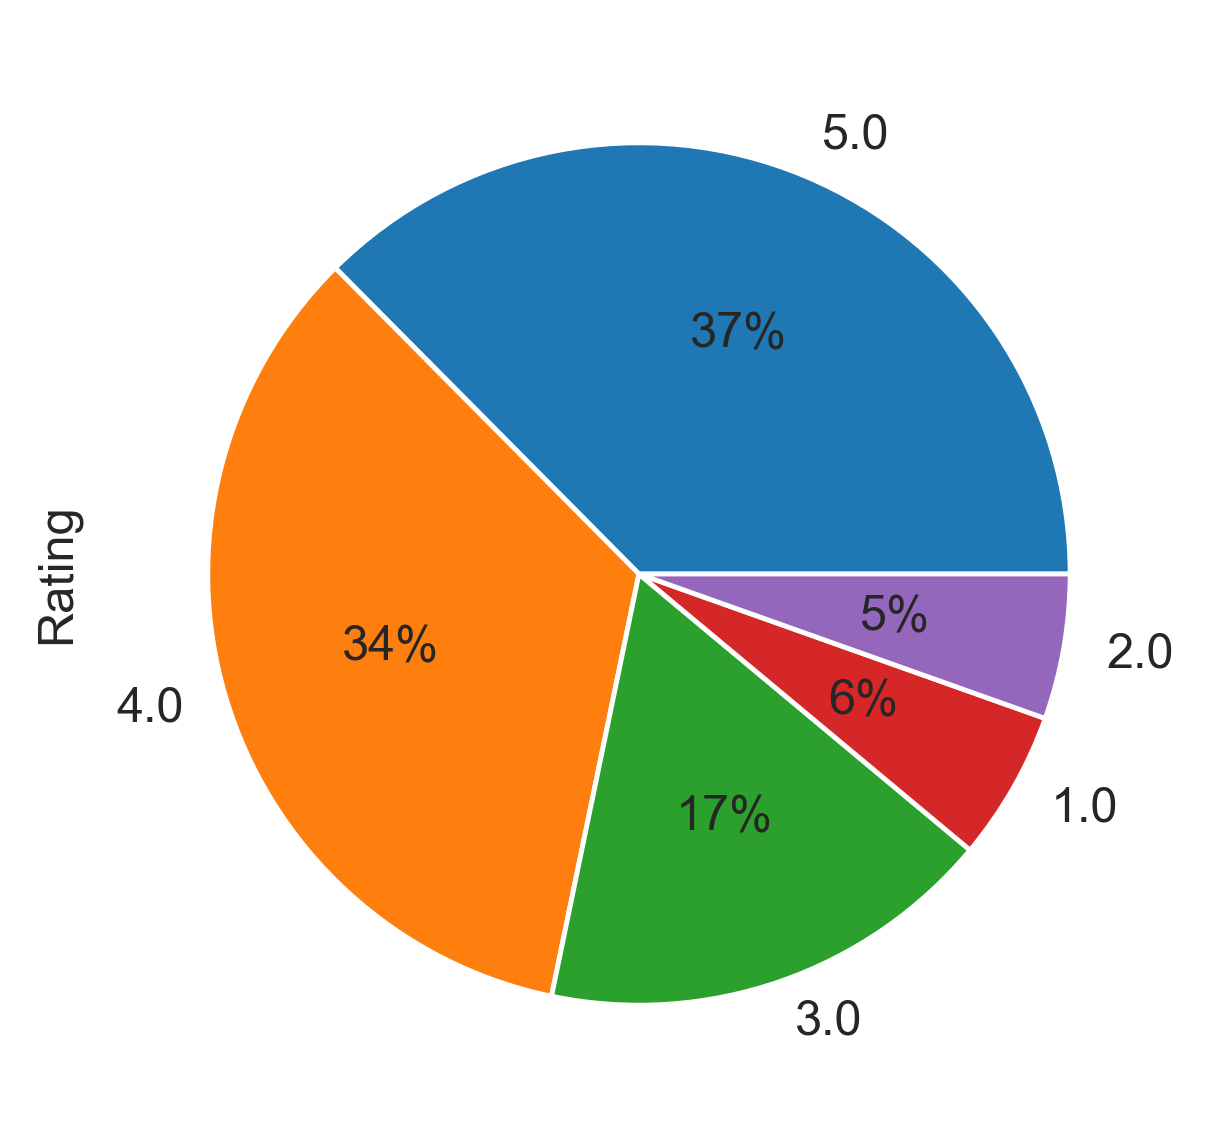

In [41]:
ts['Rating'].value_counts().plot(kind='pie',autopct='%1.00f%%')

#### Ploting Lineplot

<AxesSubplot:xlabel='Review_Date'>

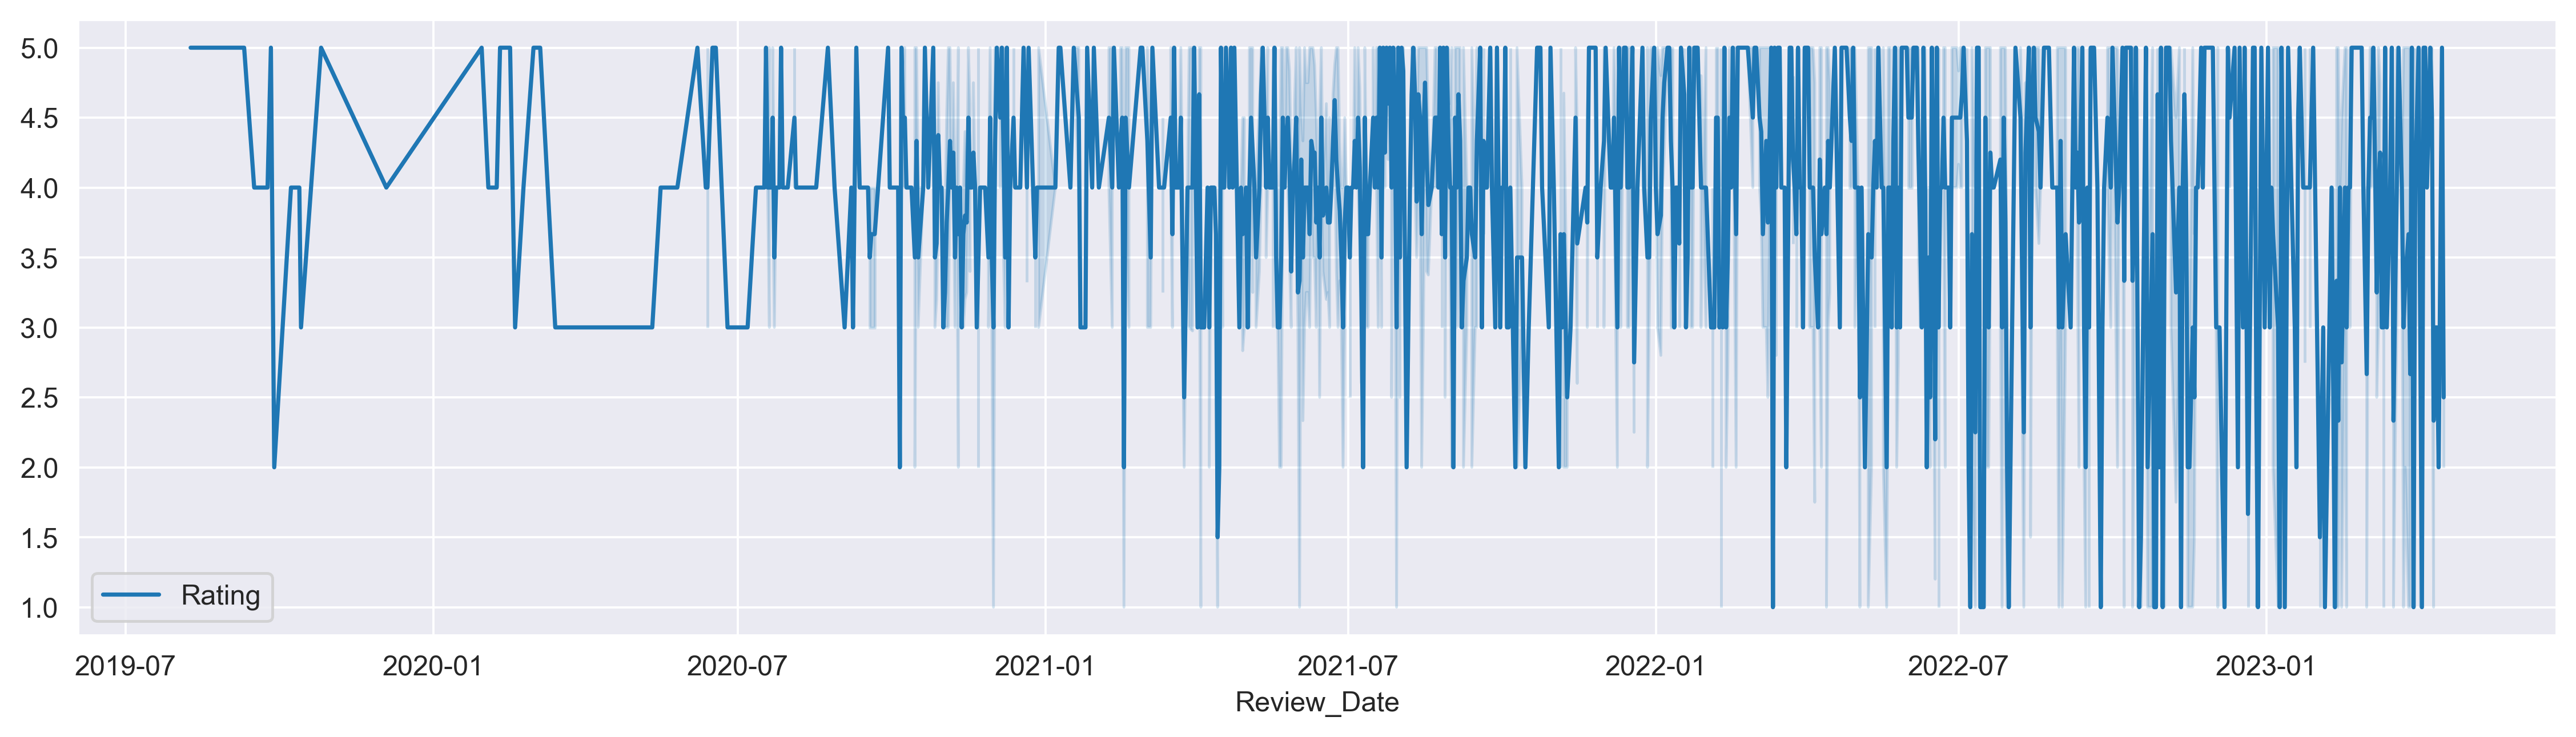

In [40]:
sns.lineplot(data= ts)